In [2]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import wc_helper
import mplhep as hep

In [3]:
file = uproot.open("waveform.root")
dec = file["wvfm/decon_wvfm/run_1_sub_0_evt_1_decon"].values()
sim = file["wvfm/sim_wvfm/run_1_sub_0_evt_1_sim"].values()

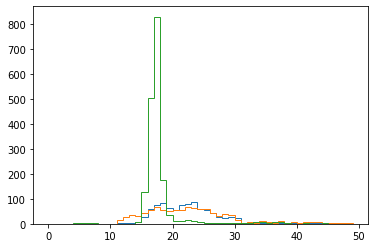

In [4]:
u_roi_arr = np.sum((wc_helper.u_ch(dec)>1),axis=1)
v_roi_arr = np.sum((wc_helper.v_ch(dec)>1),axis=1)
w_roi_arr = np.sum((wc_helper.w_ch(dec)>1),axis=1)

plt.hist(u_roi_arr[u_roi_arr>0],bins=np.arange(0,50),histtype="step")
plt.hist(v_roi_arr[v_roi_arr>0],bins=np.arange(0,50),histtype="step")
plt.hist(w_roi_arr[w_roi_arr>0],bins=np.arange(0,50),histtype="step")
plt.show()

charge resolution (u) 9403.826
charge resolution (v) 8529.872
charge resolution (w) 546.947


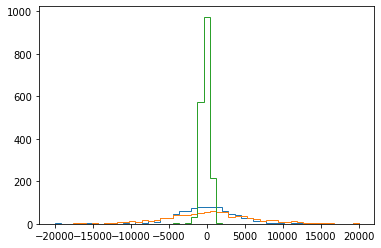

In [125]:
sim_sum = np.sum(sim,axis=1)
dec_sum = np.sum(dec,axis=1)
ch_mask = np.where(sim_sum>2500,True,False)
u_mask = wc_helper.u_ch(ch_mask); v_mask = wc_helper.v_ch(ch_mask); w_mask = wc_helper.w_ch(ch_mask)

u_diff = (wc_helper.u_ch(dec_sum)[u_mask]*50 - wc_helper.u_ch(sim_sum)[u_mask])
v_diff = (wc_helper.v_ch(dec_sum)[v_mask]*50 - wc_helper.v_ch(sim_sum)[v_mask])
w_diff = (wc_helper.w_ch(dec_sum)[w_mask]*50 - wc_helper.w_ch(sim_sum)[w_mask])

print("charge resolution (u)", np.std(u_diff))
print("charge resolution (v)", np.std(v_diff))
print("charge resolution (w)", np.std(w_diff))

plt.hist(u_diff,histtype="step",bins=np.linspace(-2e4,2e4,50))
plt.hist(v_diff,histtype="step",bins=np.linspace(-2e4,2e4,50))
plt.hist(w_diff,histtype="step",bins=np.linspace(-2e4,2e4,50))
plt.show()

average ROI window (u):  22.0
average ROI window (v):  22.5
average ROI window (w):  17.0


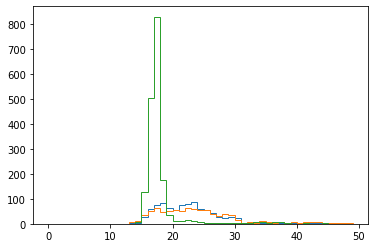

In [130]:
u_roi_arr = np.sum((wc_helper.u_ch(dec)[u_mask]>1),axis=1)
v_roi_arr = np.sum((wc_helper.v_ch(dec)[v_mask]>1),axis=1)
w_roi_arr = np.sum((wc_helper.w_ch(dec)[w_mask]>1),axis=1)
print("average ROI window (u): ", np.median(u_roi_arr[u_roi_arr>0]))
print("average ROI window (v): ", np.median(v_roi_arr[v_roi_arr>0]))
print("average ROI window (w): ", np.median(w_roi_arr[w_roi_arr>0]))
plt.hist(u_roi_arr[u_roi_arr>0],bins=np.arange(0,50),histtype="step")
plt.hist(v_roi_arr[v_roi_arr>0],bins=np.arange(0,50),histtype="step")
plt.hist(w_roi_arr[w_roi_arr>0],bins=np.arange(0,50),histtype="step")
plt.show()